In [3]:
import signac
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd

In [4]:
def generate_color_gradient(start_color, end_color, num_steps):
    """Generate a gradient of colors between two given colors.

    Parameters:
    - start_color: Starting color in RGB format (e.g., [r, g, b])
    - end_color: Ending color in RGB format (e.g., [r, g, b])
    - num_steps: Number of steps in the gradient

    Returns:
    - colors: List of color codes representing the gradient
    """
    cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", [start_color, end_color])
    norm = mcolors.Normalize(vmin=0, vmax=num_steps-1)
    colors = [cmap(norm(i)) for i in range(num_steps)]
    return colors


# Matplotlib RC Params:    
color_dict = {1.0: "#0F0E0F", 0.8: "#666666", 0.7: "#964d4d", 0.6: "#d03f3f"}
symbol_dict = {1.0: "o", 0.8: "s", 0.7: "^", 0.6: "d"}
plt.rcParams["figure.figsize"] = (3, 3)
plt.rcParams["axes.labelsize"] = 10
plt.rcParams["legend.fontsize"] = 7
plt.rcParams['lines.markersize'] = 1
plt.rcParams["lines.linestyle"] = "-"
plt.rcParams["lines.linewidth"] = 1
plt.rcParams["figure.dpi"] = 1200
plt.rcParams["legend.markerscale"] = 3

# One bead per monomer:

In [8]:
bond_project = signac.get_project("../../msibi-flow/bond-flow/")
angle_project = signac.get_project("../../msibi-flow/angle-flow/")
pair_project = signac.get_project("../../msibi-flow/pair-flow-4-states/")

## Bond Results

### Plotting Final Potentials:

(-5.0, 60.0)

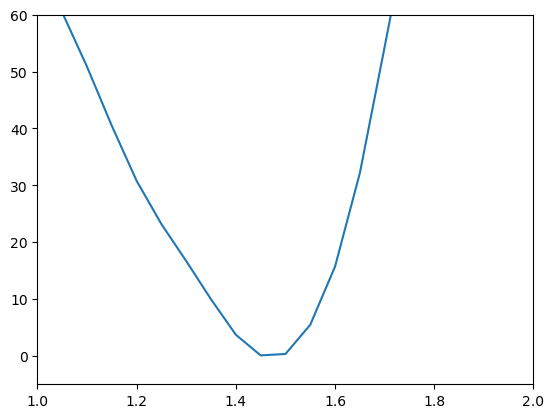

In [3]:
fig = plt.figure()
for job in bond_project:
    final_pot = np.genfromtxt(job.fn("A-A_bond.csv"), names=True, delimiter=",")
    plt.plot(final_pot["x"], final_pot["potential"])

plt.xlim(1, 2)
plt.ylim(-5, 60)

### Plotting Bond Distributions

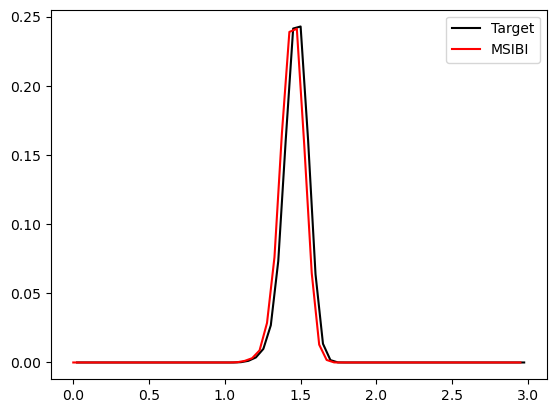

In [4]:
fig = plt.figure()
for job in bond_project:
    state = np.load(job.fn("state_A_bond_A-A_data.npz"))
    target = state["target_distribution"]
    msibi = state["current_distribution"]

    plt.plot(target[:,0], target[:,1], label="Target", color="k")
    plt.plot(msibi[:,0], msibi[:,1], label="MSIBI", color="r")

plt.legend()
plt.show()

## Angle Results

### Plotting Final Potentials:

d23d8c3ba38040009adda789dca01050
fd897cd5cffaba0fba0ffb176b0fad28


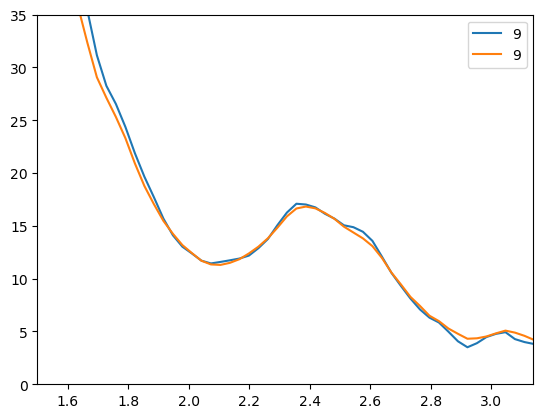

In [11]:
fig = plt.figure()
for job in angle_project:
    print(job.id)
    final_pot = np.genfromtxt(job.fn("A-A-A_angle.csv"), names=True, delimiter=",")
    plt.plot(final_pot["x"], final_pot["potential"], label=job.sp.smoothing_window)

plt.xlim(1.5, 3.14)
plt.ylim(0, 35)
plt.legend()

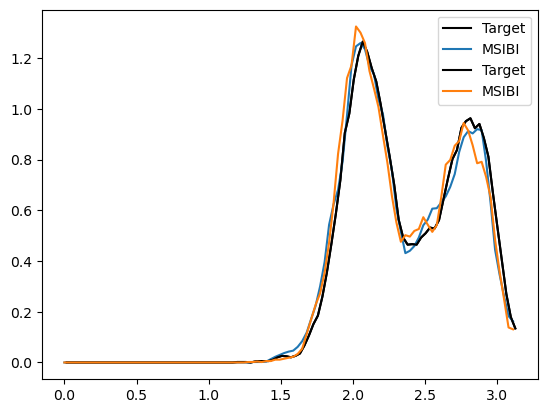

In [8]:
fig = plt.figure()
for job in angle_project:
    state = np.load(job.fn("state_A_angle_A-A-A_data.npz"))
    target = state["target_distribution"]
    msibi = state["current_distribution"]

    plt.plot(target[:,0], target[:,1], label="Target", color="k")
    plt.plot(msibi[:,0], msibi[:,1], label="MSIBI")

plt.legend()
plt.show()

## Pair MSIBI Results: 2 MSIBI Iterations

In [15]:
pair_project = signac.get_project("../../msibi-flow/pair-flow-2-states-ordered/")

### Plotting Final Potentials:

In [14]:
compare_dict = {
    "../../msibi-flow/pair-flow-4-states/": "24760a7c3625f2547d95d632113edbf7",
    "../../msibi-flow/pair-flow-3-states-unordered/": "b4289482ca51d698463f1c62717db7d8"
}

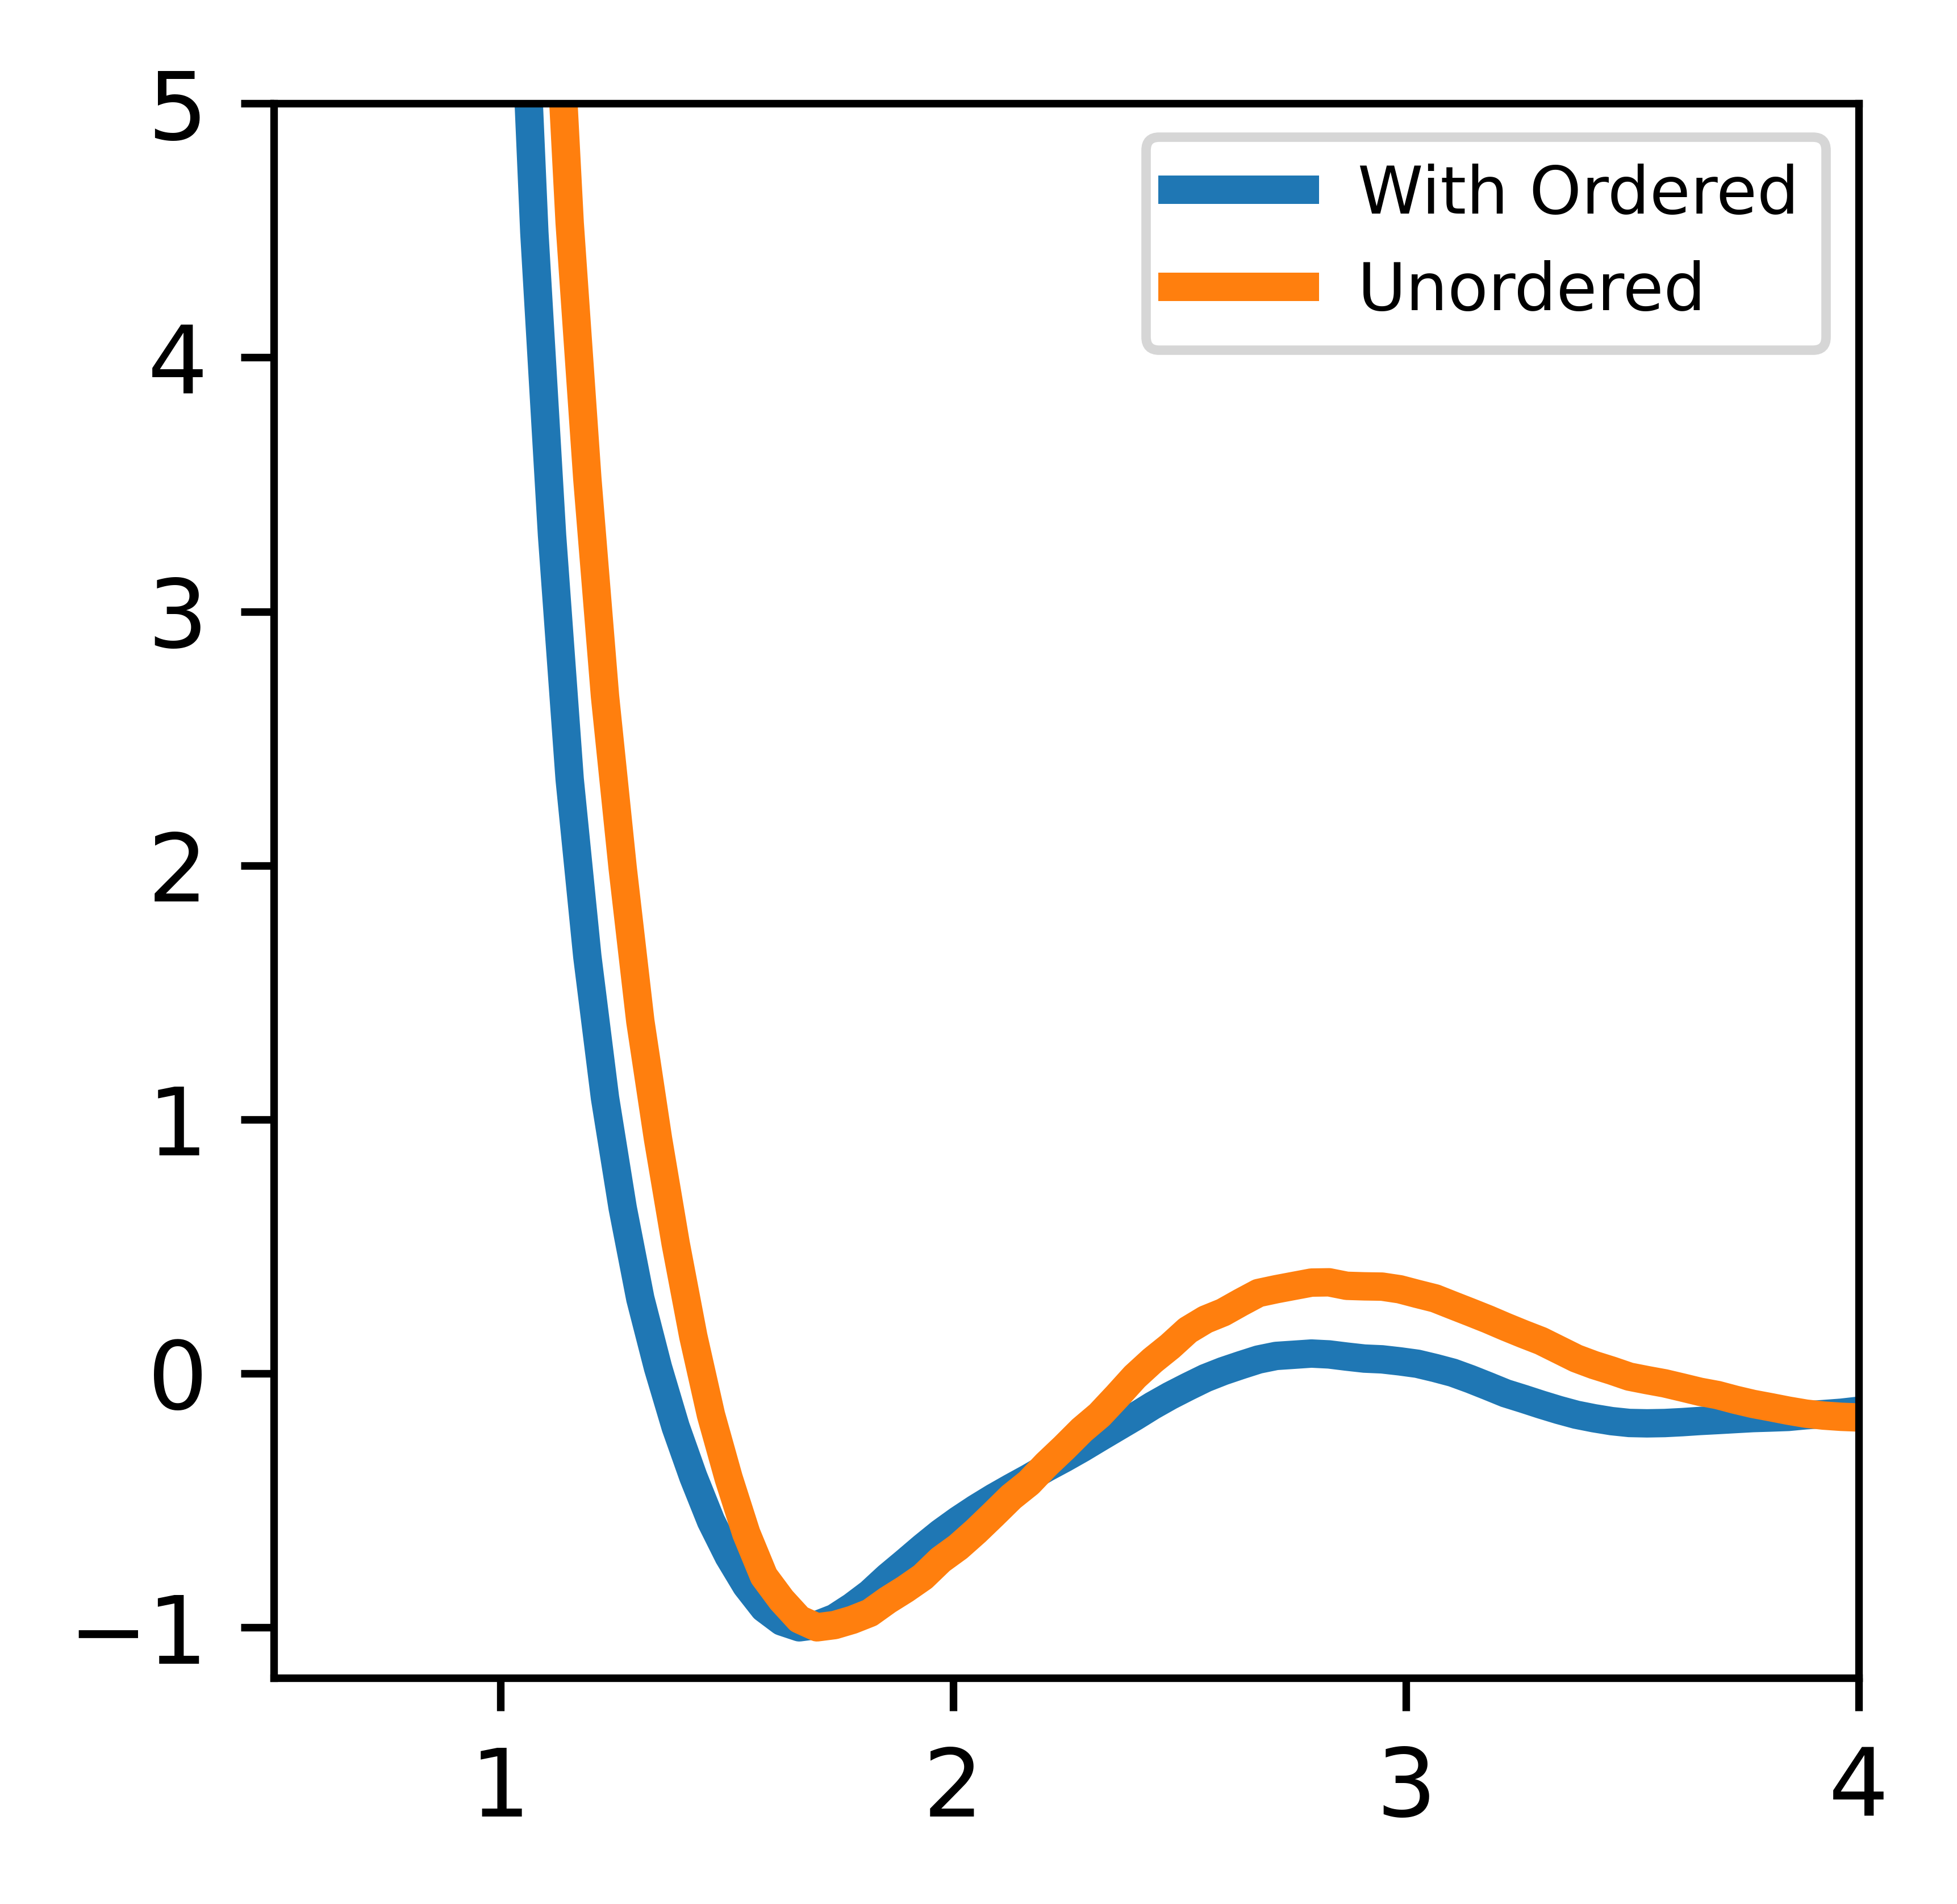

In [15]:
for proj in compare_dict:
    project = signac.get_project(proj)
    job = project.open_job(id=compare_dict[proj])
    if job.id == "24760a7c3625f2547d95d632113edbf7":
        label="With Ordered"
    else:
        label = "Unordered"
    final_pot = np.genfromtxt(job.fn("A-A_pair.csv"), names=True, delimiter=",")
    pot_min = np.min(final_pot["potential"])
    plt.plot(final_pot["x"], final_pot["potential"] - pot_min - 1, linewidth=3, label=label)

plt.xlim(0.5, 4)
plt.ylim(-1.2, 5)
plt.legend()

fb09df2d029ee8c07e0da9f48da2a446 6.0 ['bond']
c7a9e321206fae7ad59e13df4f144833 6.0 ['bond', 'angle']
28b606c02e47ca9df2397f8d12235cd9 4.0 ['bond', 'angle']


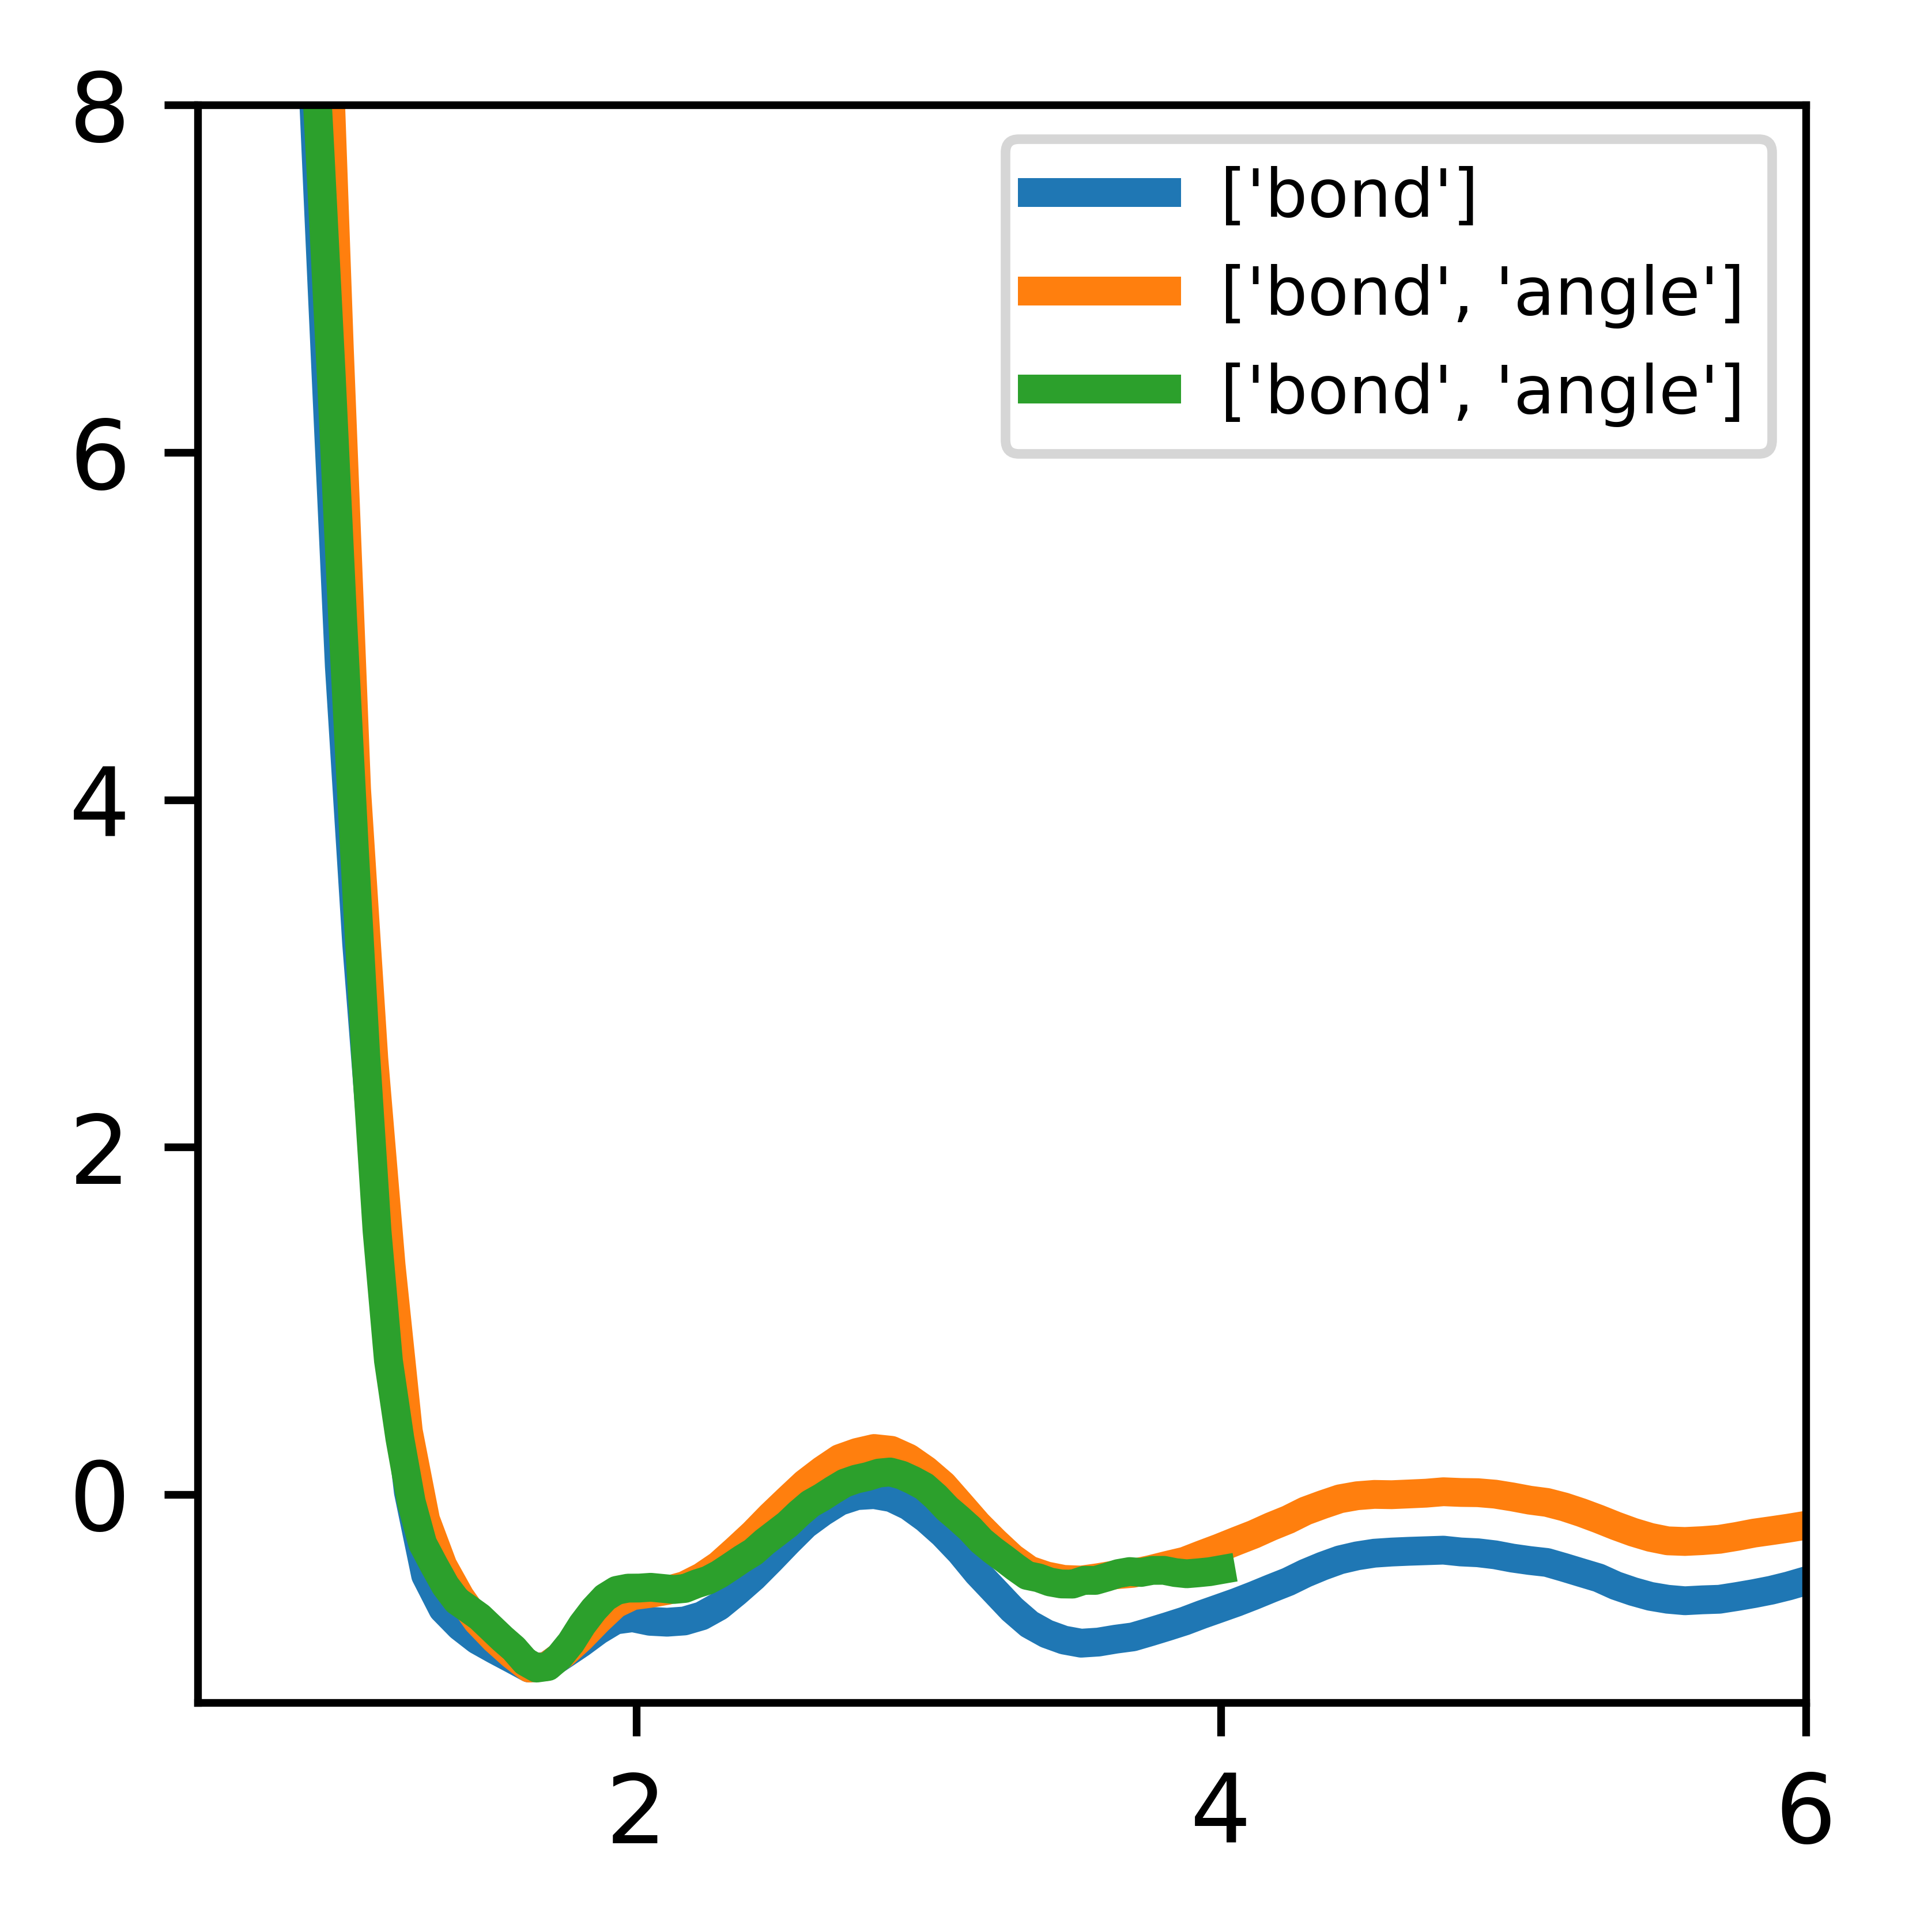

In [16]:
r_cut = 4.0

for job in pair_project.find_jobs({"doc.done": True}):
    states = [s["name"] for s in job.sp.states]
    #if states[0] != "Melted": continue
    print(job.id, job.sp.r_cut, job.sp.nlist_exclusions)
    final_pot = np.genfromtxt(job.fn("A-A_pair.csv"), names=True, delimiter=",")
    pot_min = np.min(final_pot["potential"])
    plt.plot(final_pot["x"], final_pot["potential"] - pot_min - 1, linewidth=3, label=job.sp.nlist_exclusions)


plt.xlim(0.5, 6)
plt.ylim(-1.2, 8)
plt.legend()

(1.0, 6.0)

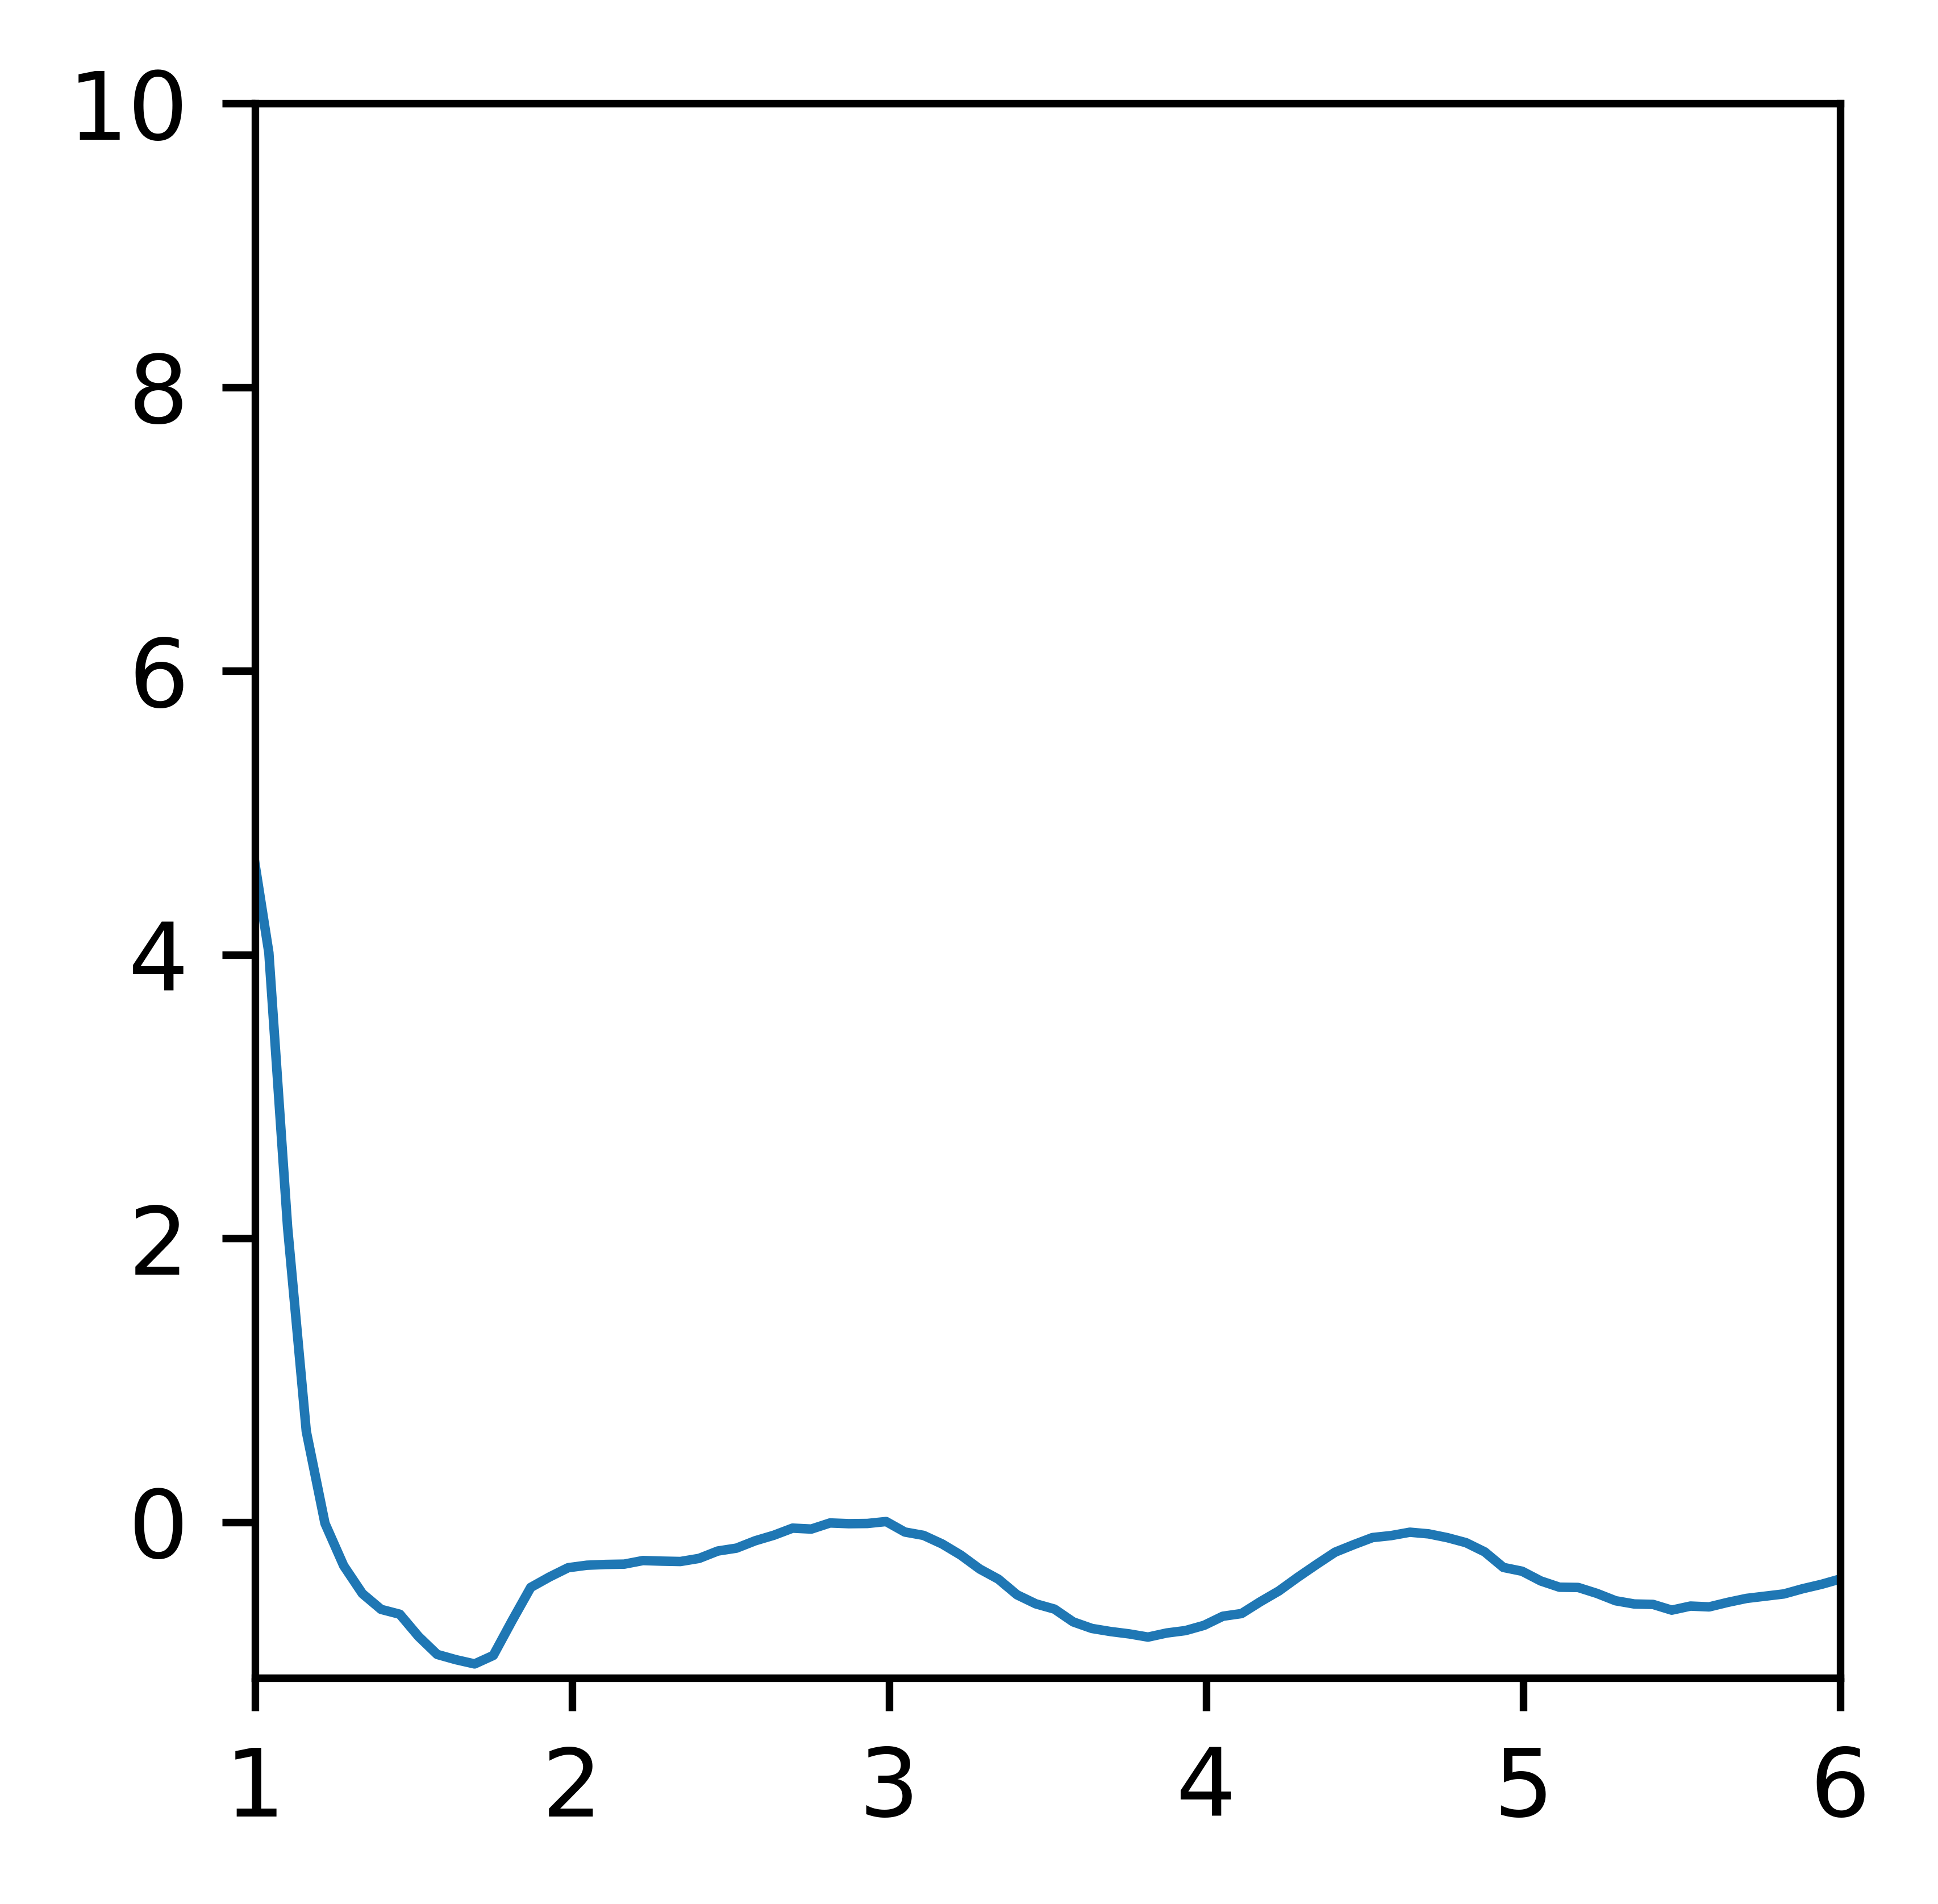

In [17]:
job = pair_project.open_job(id="fb09df2d029ee8c07e0da9f48da2a446")
iteration = -1

fig = plt.figure()
pot_history = np.load(job.fn("A-A_potential_history.npy"))
pot = pot_history[iteration]
plt.plot(pot[:,0], pot[:,1] - pot[:,1].min() - 1)

plt.ylim(-1.1, 10)
plt.xlim(1, 6)

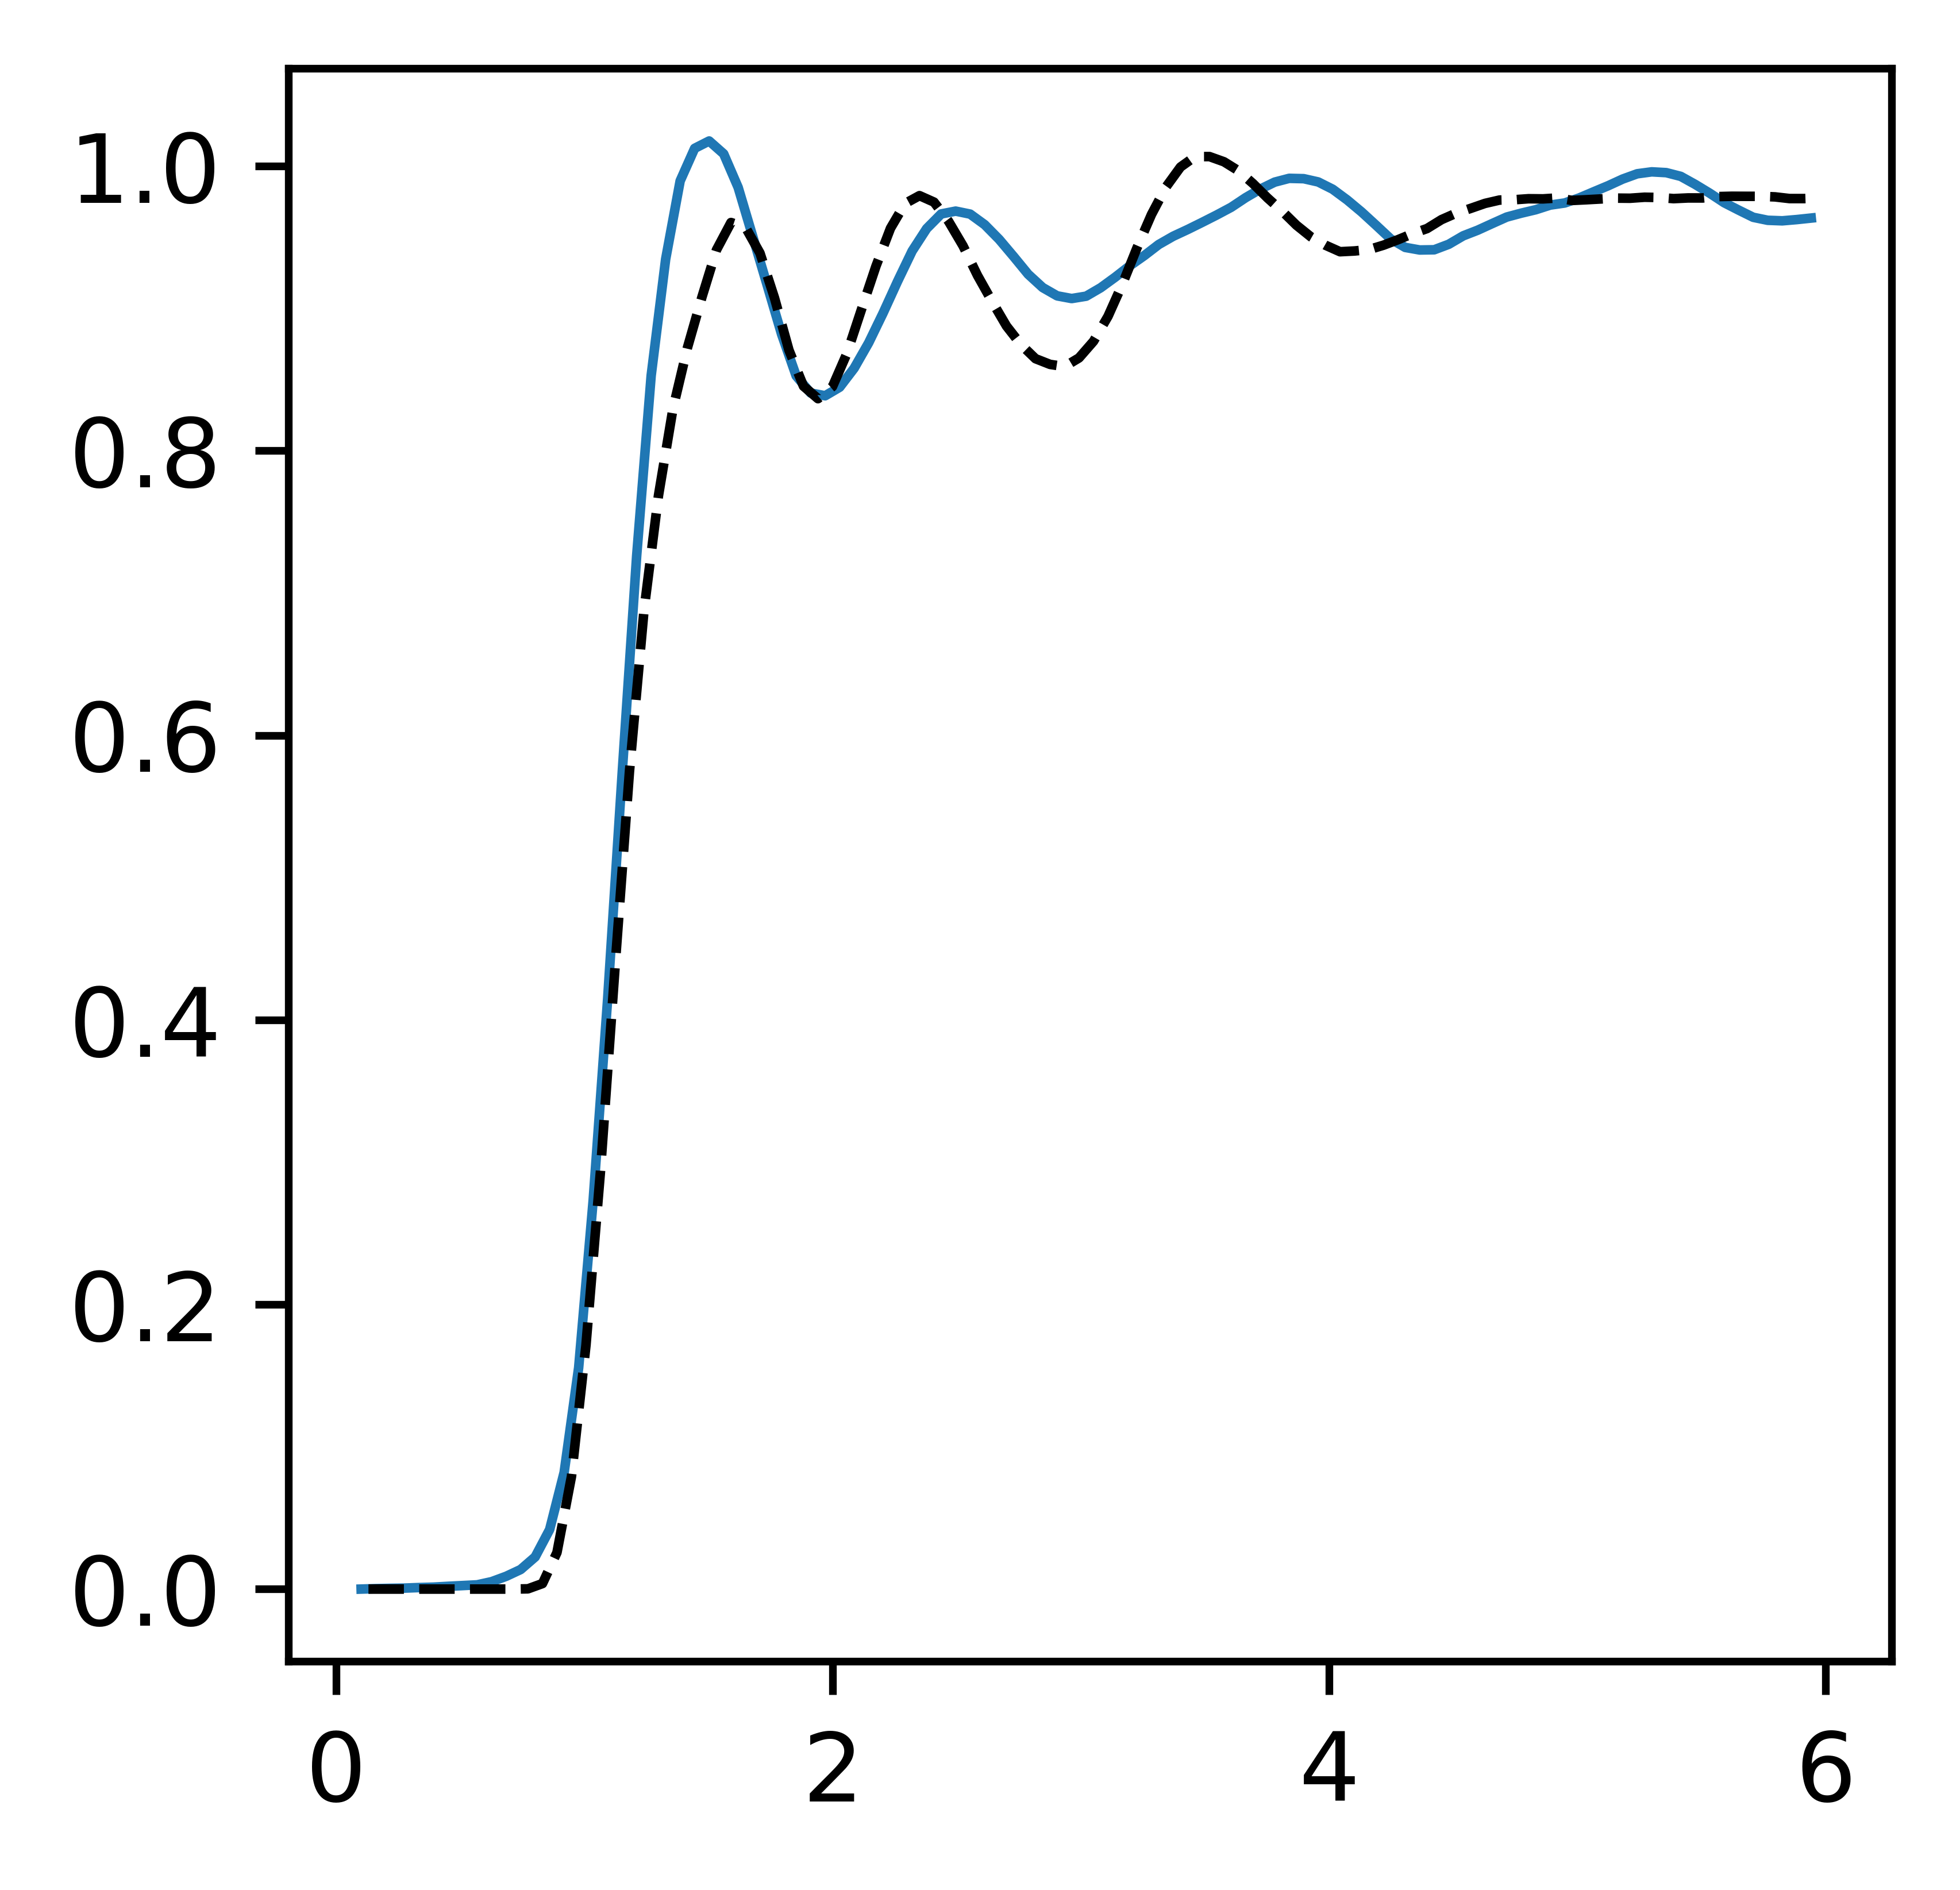

In [11]:
ordered_state = np.load(job.fn("state_Ordered_pair_A-A_data.npz"))
dist = ordered_state["distribution_history"][iteration]
target_dist = ordered_state["target_distribution"]
plt.plot(dist[:,0], dist[:,1])
plt.plot(target_dist[:,0], target_dist[:,1], "k--")

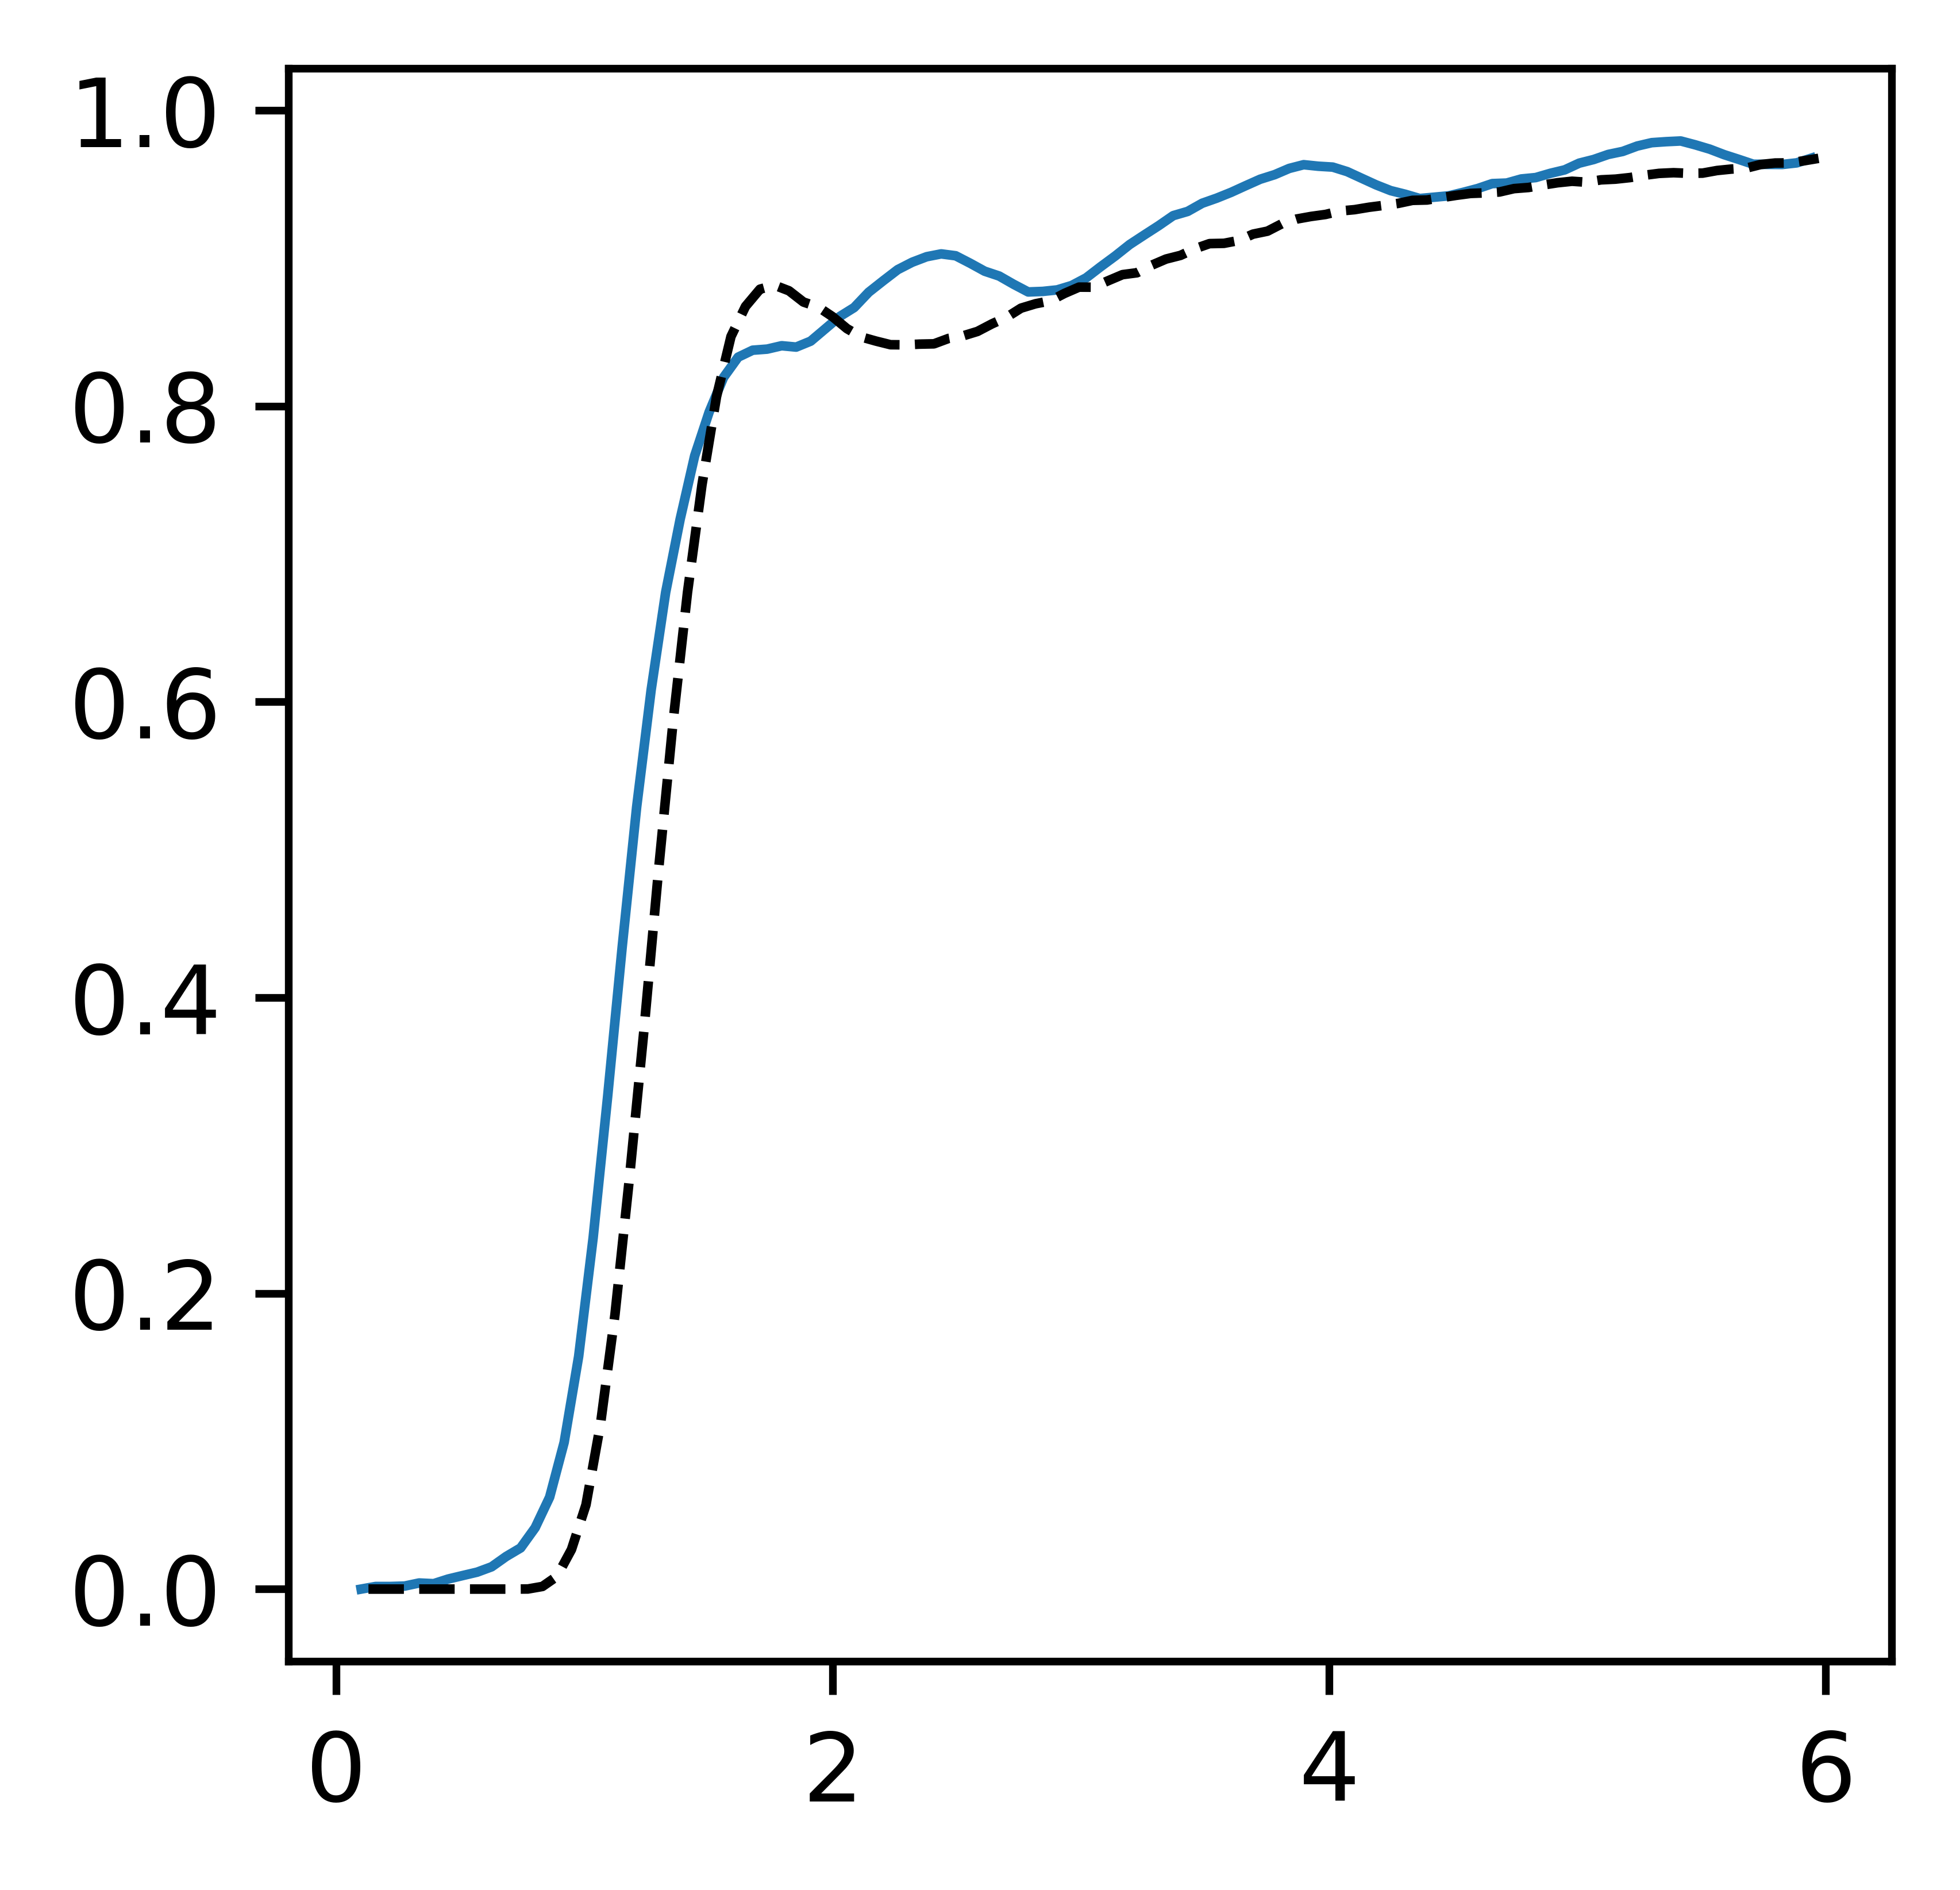

In [12]:
melt_state = np.load(job.fn("state_Melted_pair_A-A_data.npz"))
dist = melt_state["distribution_history"][iteration]
target_dist = melt_state["target_distribution"]
plt.plot(dist[:,0], dist[:,1])
plt.plot(target_dist[:,0], target_dist[:,1], "k--")

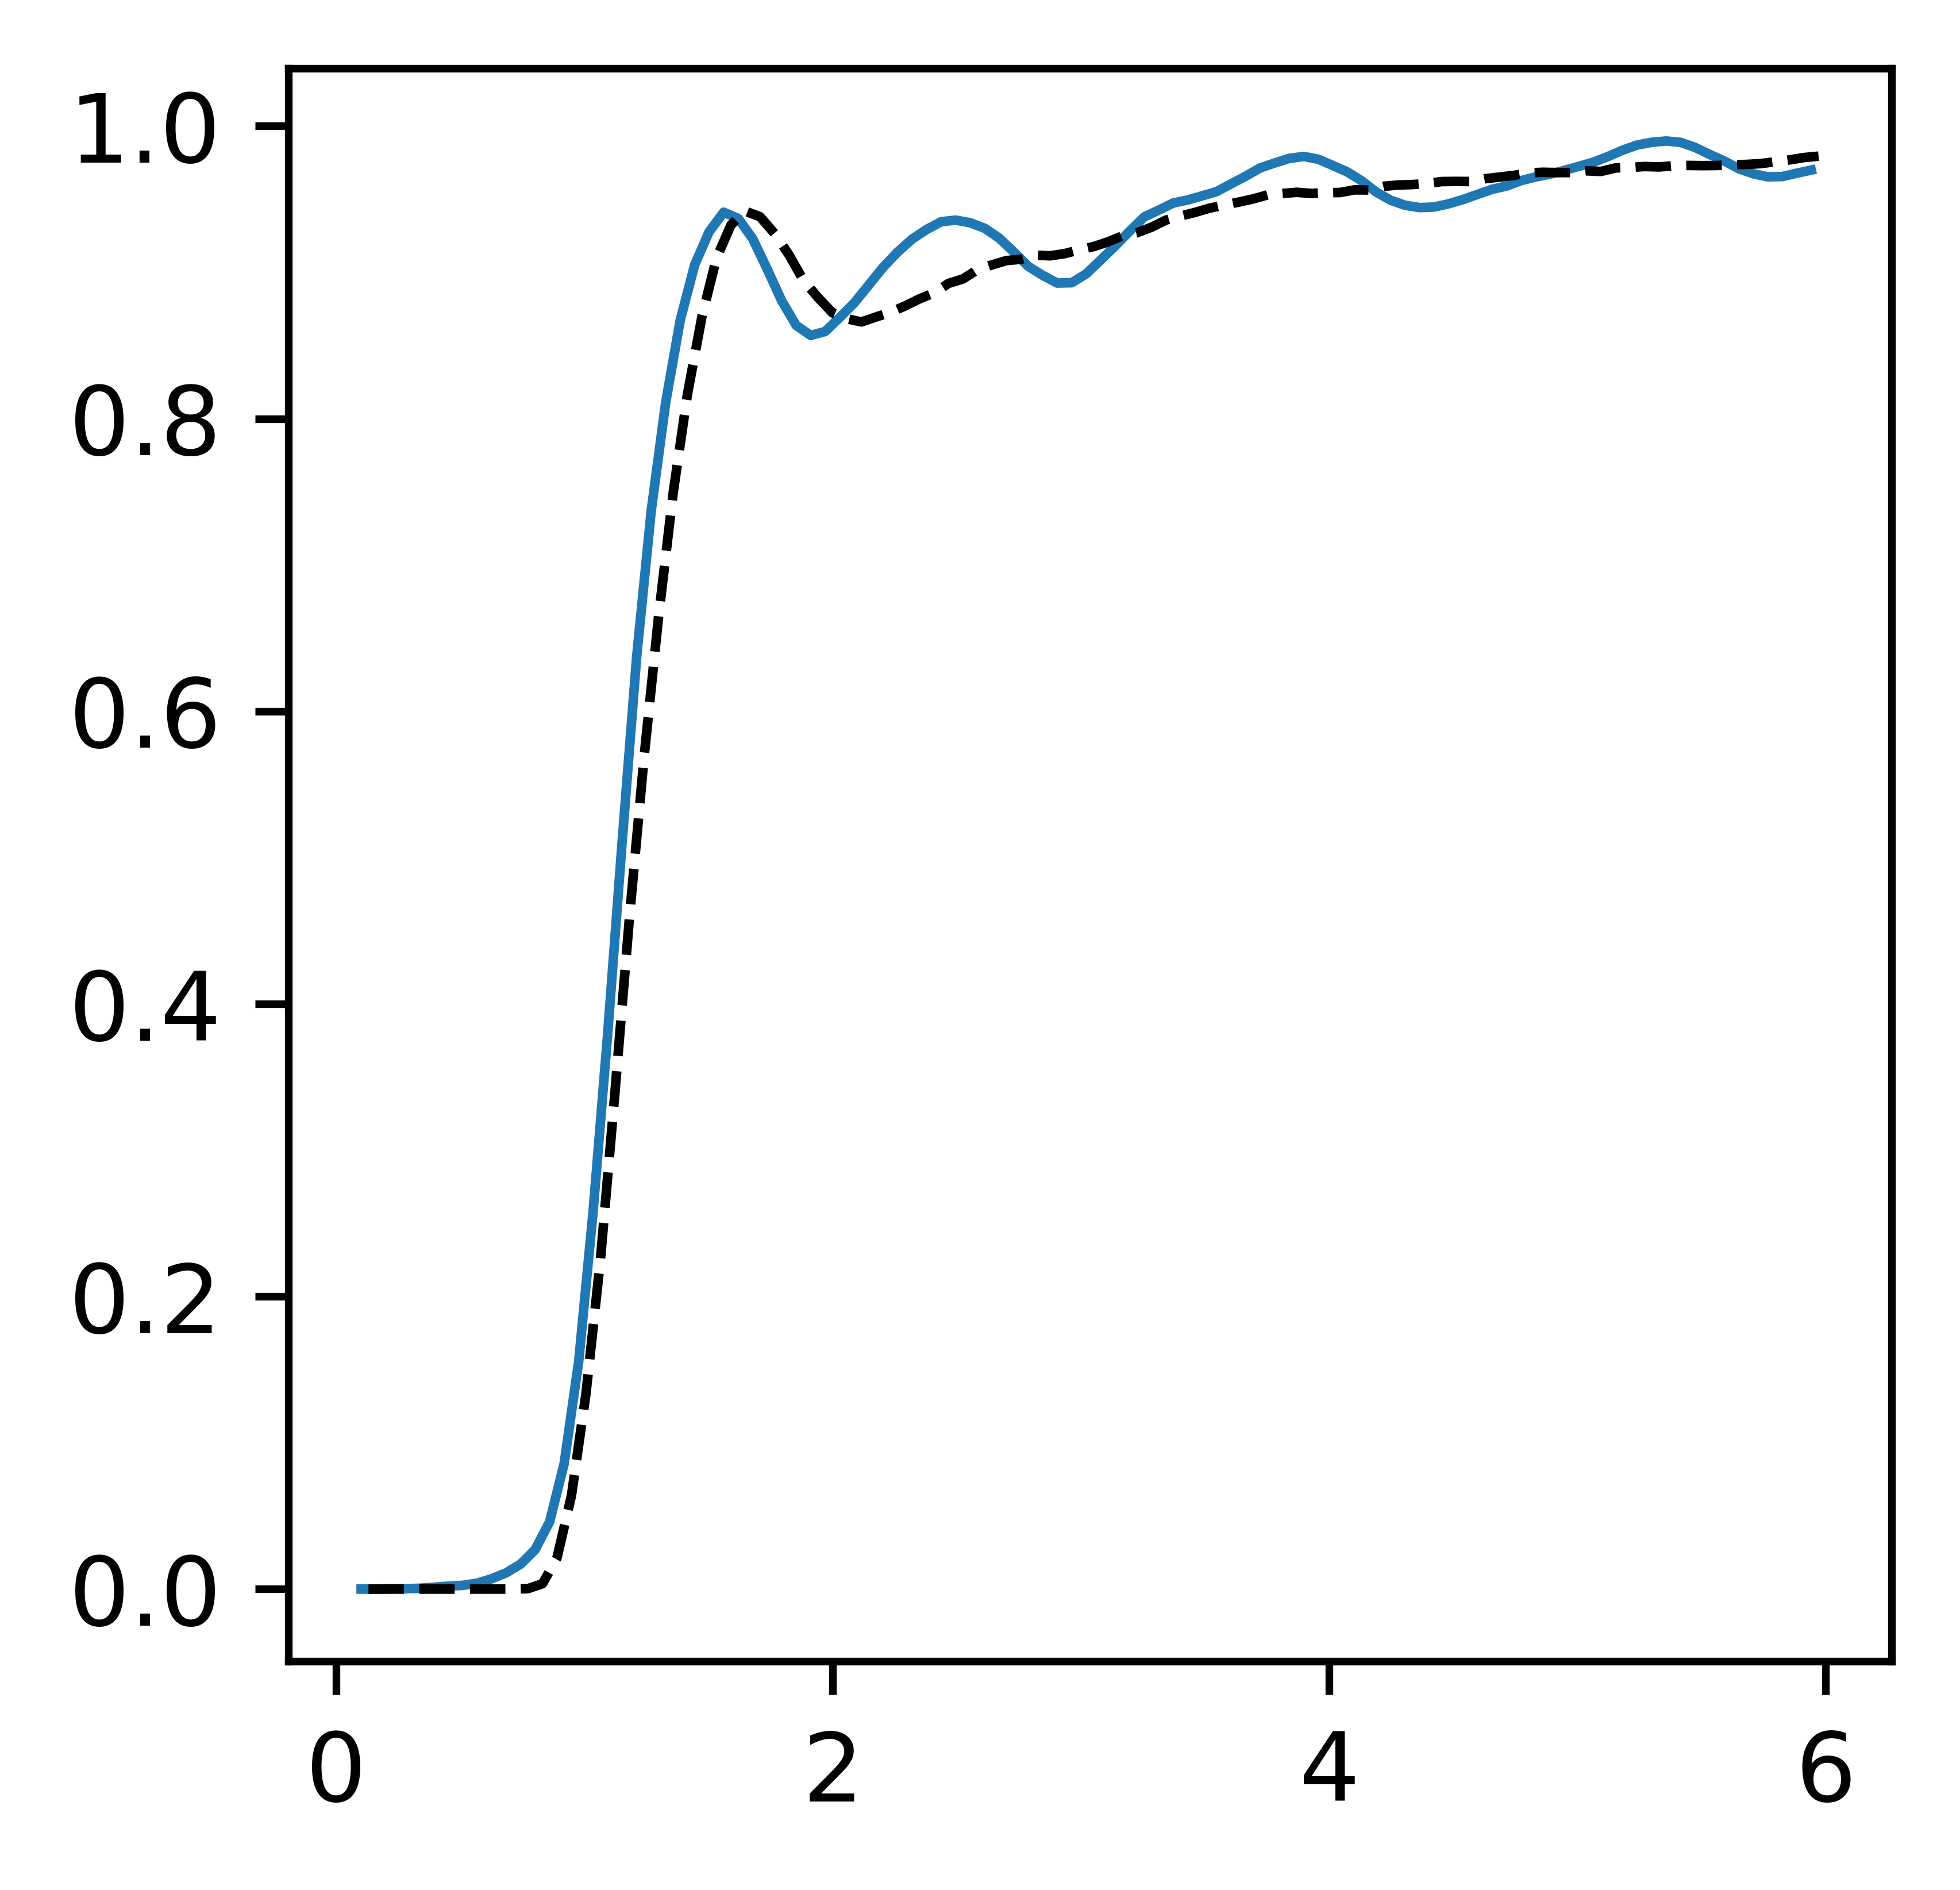

In [13]:
tg_state = np.load(job.fn("state_AmorphousTg_pair_A-A_data.npz"))
dist = tg_state["distribution_history"][iteration]
target_dist = tg_state["target_distribution"]
plt.plot(dist[:,0], dist[:,1])
plt.plot(target_dist[:,0], target_dist[:,1], "k--")

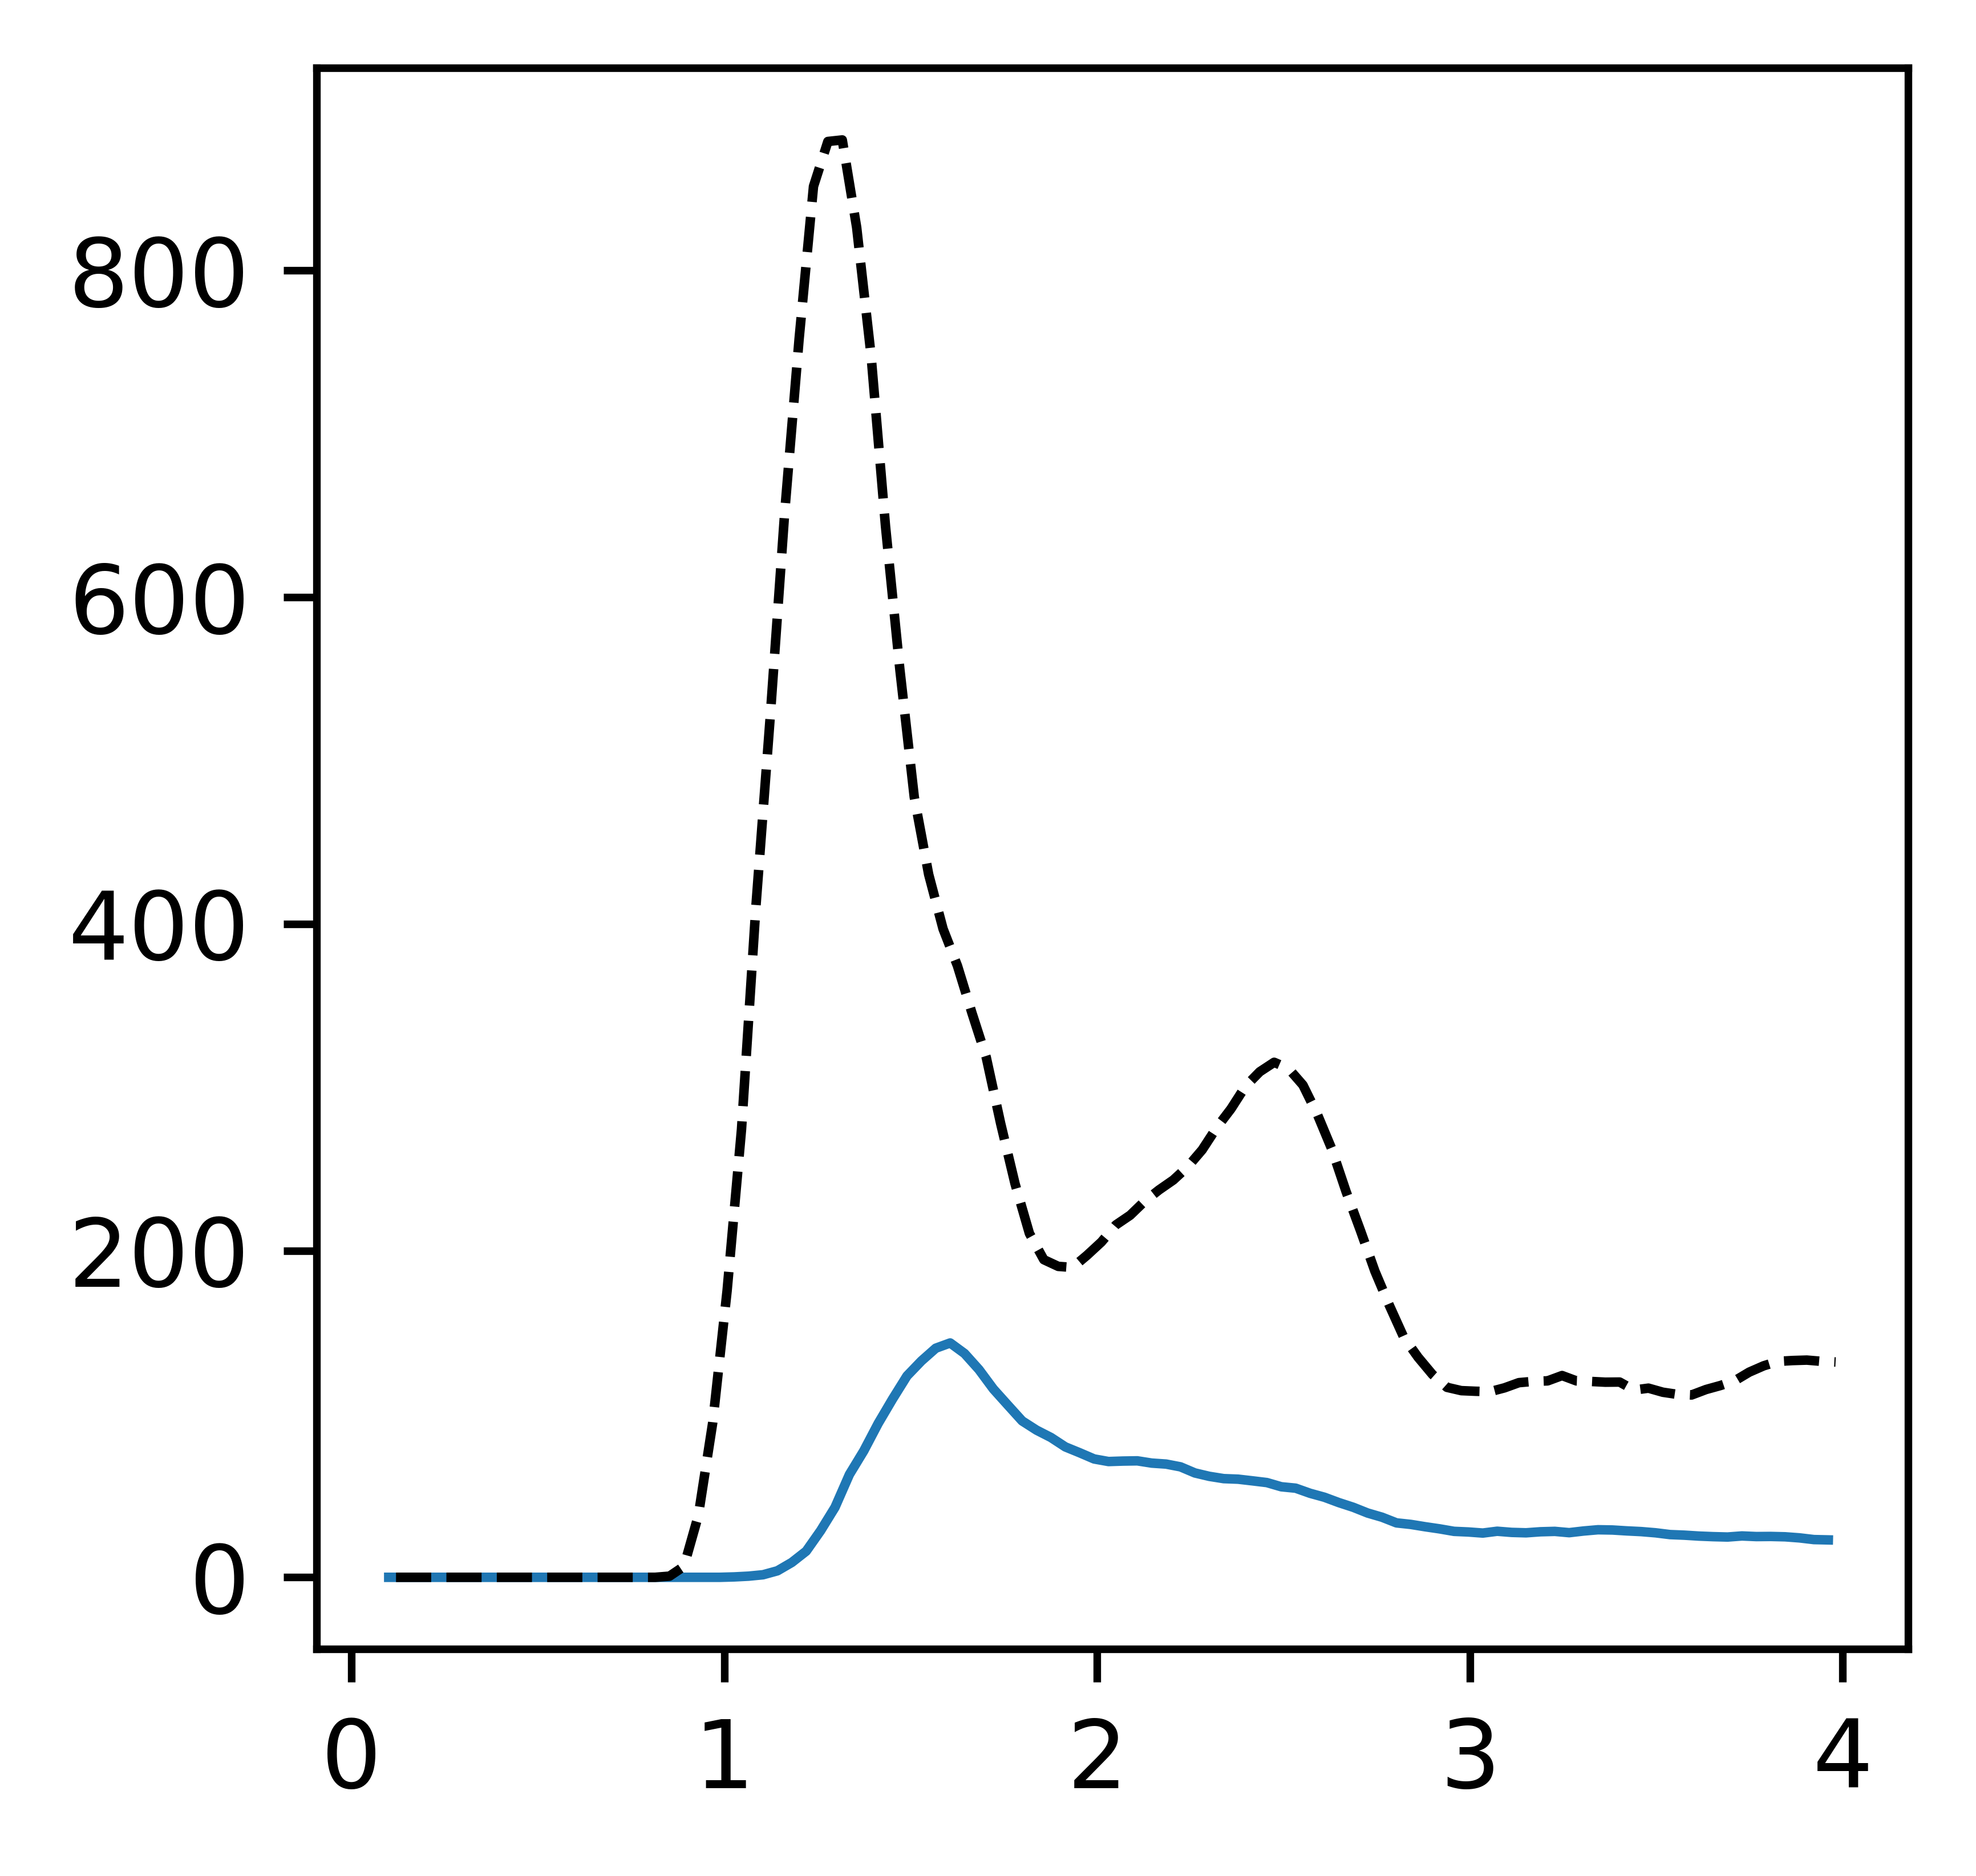

In [10]:
lowden_state = np.load(job.fn("state_LowDen_pair_A-A_data.npz"))
dist = lowden_state["distribution_history"][iteration]
target_dist = lowden_state["target_distribution"]
plt.plot(dist[:,0], dist[:,1])
plt.plot(target_dist[:,0], target_dist[:,1], "k--")